# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [55]:
# Set current amount of crypto assets


my_btc = 1.2 
my_eth = 5.3
ahi = 12000
my_spy = 50
my_agg = 200

In [56]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [57]:
# Fetch current BTC price
# YOUR CODE HERE!
response_data_btc=requests.get(btc_url)
response_data_eth=requests.get(eth_url)

response_content_btc = response_data_btc.content
response_content_eth = response_data_eth.content
print(response_content_btc)
print(response_content_eth)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18793631,\n\t\t\t"total_supply": 18793631,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 49196.0000000000000000,\n\t\t\t\t\t"volume_24h": 35322765980,\n\t\t\t\t\t"market_cap": 924600256368,\n\t\t\t\t\t"percentage_change_1h": -0.0364479231600470,\n\t\t\t\t\t"percentage_change_24h": 0.5648159436545560,\n\t\t\t\t\t"percentage_change_7d": 4.4750191346854900,\n\t\t\t\t\t"percent_change_1h": -0.0364479231600470,\n\t\t\t\t\t"percent_change_24h": 0.5648159436545560,\n\t\t\t\t\t"percent_change_7d": 4.4750191346854900\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1629619444\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1629619444,\n\t\t"num_cryptocurrencies": 3105,\n\t\t"error": null\n\t}\n}'
b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symb

In [58]:
import json

In [59]:
btcjson = response_data_btc.json()
ethjson = response_data_eth.json()

In [60]:
print(json.dumps(btcjson,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18793631,
            "total_supply": 18793631,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 49196.0,
                    "volume_24h": 35322765980,
                    "market_cap": 924600256368,
                    "percentage_change_1h": -0.036447923160047,
                    "percentage_change_24h": 0.564815943654556,
                    "percentage_change_7d": 4.47501913468549,
                    "percent_change_1h": -0.036447923160047,
                    "percent_change_24h": 0.564815943654556,
                    "percent_change_7d": 4.47501913468549
                }
            },
            "last_updated": 1629619444
        }
    },
    "metadata": {
        "timestamp": 1629619444,
        "num_cry

In [61]:
# Fetch current ETH price

#print(json.dumps(ethjson,indent=4))
currentethprice = ethjson["data"]["1027"]["quotes"]["USD"]["price"]
currentethprice

currentbtcprice = btcjson["data"]["1"]["quotes"]["USD"]["price"]
currentbtcprice


49196.0

In [62]:
# Compute current value of my crpto

my_btc_usd_value = my_btc * currentbtcprice
my_eth_usd_value = my_eth * currentethprice

print(my_btc_usd_value)
print(my_eth_usd_value)

59035.2
17278.900999999998


In [63]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_usd_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_usd_value:0.2f}")


The current value of your 1.2 BTC is $59035.20
The current value of your 5.3 ETH is $17278.90


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [79]:
# Current amount of shares

#see above

In [80]:
load_dotenv("Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/05-APIs/Instructions/APIKeys.env")

# Set Alpaca API key and secret
#Alpaca_API_KEY_ID = os.getenv("APCA_API_KEY_ID") I just can't get it to work. whatever
alpacakeyid= "PKE1PU3B91KA9LHO8G5J"

#alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY") I just can't get it to work. whatever
alpacasecretkey= "yEMYj7C5SnE2W8S2XPa2AUWIX1egtq8LySnctlpd"

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpacakeyid,
    alpacasecretkey,
    api_version="v2")

In [94]:
# Format current date as ISO format
currentdate = pd.Timestamp.now().isoformat()
currentdate

'2021-08-22T10:49:05.143344'

In [97]:

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = currentdate,
    end = currentdate
).df

df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

df_closing_prices.index = df_closing_prices.index.date

# Preview DataFrame
df_closing_prices.head(10)

,AGG,SPY
2021-03-31,113.82,396.2800
2021-04-01,114.02,400.5300
2021-04-05,113.81,406.3000
2021-04-06,114.21,406.0600
2021-04-07,114.03,406.5711
2021-04-08,114.30,408.4900
2021-04-09,114.18,411.4350
2021-04-12,114.15,411.6200
2021-04-13,114.46,412.8200
2021-04-14,114.38,411.4800


In [129]:
# Pick AGG and SPY close prices
lastaggclosing = df_closing_prices['AGG'].iloc[0]

lastspyclosing = df_closing_prices['SPY'].iloc[0]

print(lastaggclosing)
print(lastspyclosing)

113.82
396.28


In [130]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${lastaggclosing}")
print(f"Current SPY closing price: ${lastspyclosing}")

Current AGG closing price: $113.82
Current SPY closing price: $396.28


In [131]:
# Compute the current value of shares
my_spy_val = my_spy * lastspyclosing
my_agg_val = my_agg * lastaggclosing

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_val:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_val:0.2f}")

The current value of your 50 SPY shares is $19814.00
The current value of your 200 AGG shares is $22764.00


### Savings Health Analysis

In [158]:
# Set monthly household income
print(ahi)

combinedcryptoval = my_btc_usd_value+my_eth_usd_value
combinedstocksval = my_spy_val+my_agg_val

columndata= [combinedcryptoval,combinedstocksval]
rownames = ["crypto","stocks"]

12000


In [160]:
# Create savings DataFrame
df_savings = pd.DataFrame({"amount":columndata},index=rownames)
    

# To analyze savings health, create a DataFrame called 
# `df_savings` with two rows. Store the total value in 
# dollars of the crypto assets in the first row and the
# total value of the shares in the second row.

# **Hint:** The `df_savings` DataFrame should have one 
# column named `amount` and two rows where `crypto` and
# `shares` are the index values

                               
# Display savings DataFrame
df_savings.head()

,amount
crypto,76314.101
stocks,42578.000


<AxesSubplot:ylabel='amount'>

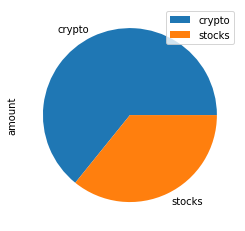

In [162]:
# Plot savings pie chart
df_savings.plot(kind="pie",y="amount")

In [177]:
# Set ideal emergency fund
emergency_fund = ahi * 3
print(emergency_fund)

# Calculate total amount of savings
dftotal = df_savings["amount"].sum()
print(dftotal)

# Validate saving health
if dftotal >= emergency_fund:
    print("healthy savings and emergency fund")
else: print("fix your finances")

36000
118892.101
healthy savings and emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [237]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-20', tz='America/New_York').isoformat()

In [238]:
# Get 5 years' worth of historical data for SPY and AGG
tickers5yrs = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe5yrs = "1D"

# Get current closing prices for SPY and AGG
df_5yrs = alpaca.get_barset(
    tickers5yrs,
    timeframe5yrs,
    start = start_date,
    end = end_date
).df

df_5yrs_closing_prices = pd.DataFrame()

df_5yrs_closing_prices["AGG"] = df_5yrs["AGG"]["close"]
df_5yrs_closing_prices["SPY"] = df_5yrs["SPY"]["close"]

df_5yrs_closing_prices.index = df_5yrs_closing_prices.index.date

# Preview DataFrame
df_5yrs


AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2021-03-31 00:00:00-04:00  113.84  113.9800  113.710  113.82  5846835  395.34   
2021-04-01 00:00:00-04:00  113.93  114.0500  113.830  114.02  9491702  398.40   
2021-04-05 00:00:00-04:00  113.78  113.8900  113.690  113.81  8852289  403.46   
2021-04-06 00:00:00-04:00  113.98  114.2200  113.950  114.21  4755353  405.76   
2021-04-07 00:00:00-04:00  114.12  114.2968  114.025  114.03  4290278  405.94   
...                           ...       ...      ...     ...      ...     ...   
2021-08-16 00:00:00-04:00  116.14  116.2700  116.030  116.03  3406963  444.54   
2021-08-17 00:00:00-04:00  115.98  116.0900  115.930  115.95  4493522  444.24   
2021-08-18 00:00:00-04:00  115.94  116.0300  115.800  115.96  3840678  442.96   
2021-08-19 00:00:00-04:00  116.12  116.1550  116.020  116.14  4314380  436.27   
2021-08-20 00:00:00-04:00  116.18  116.2100  116.080  116.15  2672679  440.23   

                                                                
                              high     low     close    volume  
time                                                            
2021-03-31 00:00:00-04:00  398.000  395.31  396.2800  88541243  
2021-04-01 00:00:00-04:00  400.670  398.18  400.5300  72713146  
2021-04-05 00:00:00-04:00  406.940  403.38  406.3000  81754108  
2021-04-06 00:00:00-04:00  407.240  405.40  406.0600  54199969  
2021-04-07 00:00:00-04:00  406.960  405.45  406.5711  48749523  
...                            ...     ...       ...       ...  
2021-08-16 00:00:00-04:00  447.110  442.87  447.0200  52706914  
2021-08-17 00:00:00-04:00  444.960  440.85  444.0600  84161406  
2021-08-18 00:00:00-04:00  444.625  438.92  439.2100  70093163  
2021-08-19 00:00:00-04:00  441.140  436.12  439.8400  84838725  
2021-08-20 00:00:00-04:00  443.710  439.71  443.3300  63120064  

[100 rows x 10 columns]

In [248]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_5yrs,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000878,0.994855,1.002860,1.003978,0.997913,1.006469,1.002321,1.003184,0.999083,1.003447,...,1.000424,1.005270,1.007979,0.999730,1.003673,1.002339,1.000041,1.006800,1.000323,0.997083
2,1.004707,0.998577,1.004825,1.005733,1.000217,1.005829,1.000058,1.005649,0.999329,1.000361,...,1.001792,1.000810,1.013349,0.998553,1.005276,1.004536,1.002003,1.009088,0.998121,0.997032
3,1.013245,0.998138,1.005444,1.006785,1.000426,1.006847,1.004945,1.003454,1.003228,1.000557,...,1.002628,1.003607,1.014131,0.997964,1.009201,1.008228,0.999273,1.013624,0.999589,0.994495
4,1.016512,0.997150,1.004884,1.005886,1.000843,1.003104,1.007270,1.000824,1.006729,1.000600,...,1.006156,1.003023,1.019908,0.999375,1.011743,1.005982,0.993359,1.012469,0.999974,0.993983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,82.639542,88.661192,87.731021,83.250026,67.844938,100.716553,62.477580,73.091236,86.986210,57.410768,...,68.375310,90.826159,125.188415,96.708092,101.089198,104.991437,95.355533,59.556190,126.350187,86.149998
7557,82.919993,88.810169,87.756801,83.645987,67.710343,100.733269,62.440307,73.021283,86.974586,57.572427,...,68.325380,90.666788,125.280523,96.556410,100.599242,104.658053,95.511636,59.668392,126.535599,86.402813
7558,82.961947,89.487999,87.515042,83.765656,67.733114,100.849067,62.596475,72.900565,87.162535,57.763678,...,68.817882,91.085731,124.979273,96.756510,100.632547,104.432653,95.733858,59.725144,125.981575,85.996514
7559,83.019046,89.399521,87.700970,83.550623,68.083549,101.126598,62.468314,72.976358,87.156740,57.850925,...,69.128420,91.168617,125.758921,96.829107,100.488388,104.747442,95.553751,59.516254,125.862744,85.665158


In [249]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2021-03-31 00:00:00-04:00  113.84  113.9800  113.710  113.82  5846835   
2021-04-01 00:00:00-04:00  113.93  114.0500  113.830  114.02  9491702   
2021-04-05 00:00:00-04:00  113.78  113.8900  113.690  113.81  8852289   
2021-04-06 00:00:00-04:00  113.98  114.2200  113.950  114.21  4755353   
2021-04-07 00:00:00-04:00  114.12  114.2968  114.025  114.03  4290278   
...                           ...       ...      ...     ...      ...   
2021-08-16 00:00:00-04:00  116.14  116.2700  116.030  116.03  3406963   
2021-08-17 00:00:00-04:00  115.98  116.0900  115.930  115.95  4493522   
2021-08-18 00:00:00-04:00  115.94  116.0300  115.800  115.96  3840678   
2021-08-19 00:00:00-04:00  116.12  116.1550  116.020  116.14  4314380   
2021-08-20 00:00:00-04:00  116.18  116.2100  116.080  116.15  2672679   

                                           SPY                             \
                          daily_return    open     high     low     close   
time                                                                        
2021-03-31 00:00:00-04:00          NaN  395.34  398.000  395.31  396.2800   
2021-04-01 00:00:00-04:00     0.001757  398.40  400.670  398.18  400.5300   
2021-04-05 00:00:00-04:00    -0.001842  403.46  406.940  403.38  406.3000   
2021-04-06 00:00:00-04:00     0.003515  405.76  407.240  405.40  406.0600   
2021-04-07 00:00:00-04:00    -0.001576  405.94  406.960  405.45  406.5711   
...                                ...     ...      ...     ...       ...   
2021-08-16 00:00:00-04:00     0.000517  444.54  447.110  442.87  447.0200   
2021-08-17 00:00:00-04:00    -0.000689  444.24  444.960  440.85  444.0600   
2021-08-18 00:00:00-04:00     0.000086  442.96  444.625  438.92  439.2100   
2021-08-19 00:00:00-04:00     0.001552  436.27  441.140  436.12  439.8400   
2021-08-20 00:00:00-04:00     0.000086  440.23  443.710  439.71  443.3300   

                                                  
                             volume daily_return  
time                                              
2021-03-31 00:00:00-04:00  88541243          NaN  
2021-04-01 00:00:00-04:00  72713146     0.010725  
2021-04-05 00:00:00-04:00  81754108     0.014406  
2021-04-06 00:00:00-04:00  54199969    -0.000591  
2021-04-07 00:00:00-04:00  48749523     0.001259  
...                             ...          ...  
2021-08-16 00:00:00-04:00  52706914     0.002512  
2021-08-17 00:00:00-04:00  84161406    -0.006622  
2021-08-18 00:00:00-04:00  70093163    -0.010922  
2021-08-19 00:00:00-04:00  84838725     0.001434  
2021-08-20 00:00:00-04:00  63120064     0.007935  

[100 rows x 12 columns]

In [250]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.summarize_cumulative_return()

count           500.000000
mean             83.174866
std              20.485423
min              37.615082
25%              68.939751
50%              80.094883
75%              94.075727
max             184.903948
95% CI Lower     50.686967
95% CI Upper    128.095461
Name: 7560, dtype: float64

[]

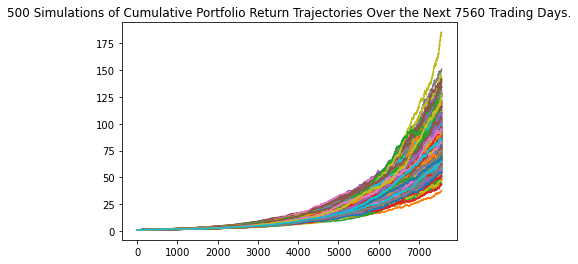

In [251]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
line_plot.plot()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

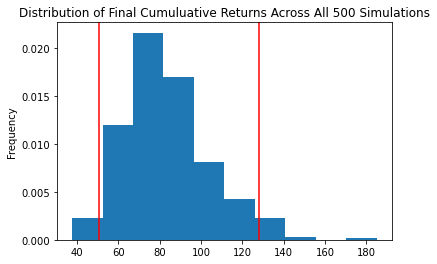

In [252]:
# Plot probability distribution and confidence intervals
MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [253]:
# Fetch summary statistics from the Monte Carlo simulation results
thirtytbl = MC_thirtyyear.summarize_cumulative_return()
thirtytbl

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean             83.174866
std              20.485423
min              37.615082
25%              68.939751
50%              80.094883
75%              94.075727
max             184.903948
95% CI Lower     50.686967
95% CI Upper    128.095461
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [254]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirtytbl[8]*initial_investment,2)
ci_upper = round(thirtytbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1013739.34 and $2561909.22


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [255]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirtytbl[8]*initial_investment,2)
ci_upper = round(thirtytbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1520609.0 and $3842863.83


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [256]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear = MCSimulation(
    portfolio_data = df_5yrs,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002568,1.001100,1.000321,0.999250,0.997841,0.998991,1.000910,1.000701,1.001716,1.007074,...,1.002054,1.003640,0.997992,1.002448,1.000305,1.001414,1.001315,1.006229,1.001981,0.999536
2,1.001339,1.000054,1.006027,1.000676,0.995529,0.994240,1.003366,1.002091,1.001975,1.005848,...,1.002789,1.003511,0.994447,1.008591,0.998124,1.005932,0.997551,1.002694,1.002585,1.001664
3,1.003390,1.000320,1.007733,1.000699,0.993769,0.999001,1.004346,1.001956,1.001605,1.002677,...,1.003556,1.003686,0.997774,1.012766,1.002967,1.008636,1.002194,1.004172,1.003542,1.001893
4,1.002994,1.005079,1.008714,0.997718,0.988586,0.998687,1.003094,0.997798,1.002719,0.997876,...,1.001015,1.005932,0.998828,1.016623,1.004436,1.009996,1.001861,1.004668,0.999738,1.002424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.334760,2.064273,1.957268,2.174011,2.228301,2.235912,2.023994,1.858189,1.968688,1.744094,...,1.784357,1.850860,2.220496,2.537903,1.937039,2.058405,2.159970,2.509157,2.278890,2.197978
1257,2.337702,2.062014,1.969870,2.176953,2.221424,2.225549,2.029410,1.851840,1.966461,1.740545,...,1.775873,1.852286,2.222121,2.550804,1.947296,2.056154,2.161179,2.515600,2.276801,2.190944
1258,2.331947,2.060498,1.968063,2.166341,2.219716,2.227685,2.033177,1.842683,1.962509,1.743263,...,1.776943,1.856570,2.217425,2.557682,1.939240,2.054275,2.160378,2.505069,2.285593,2.193262
1259,2.335841,2.063852,1.967459,2.163876,2.214147,2.229147,2.039928,1.843205,1.975017,1.753743,...,1.778363,1.856088,2.234020,2.561077,1.940706,2.049819,2.158220,2.510930,2.291867,2.196439


[]

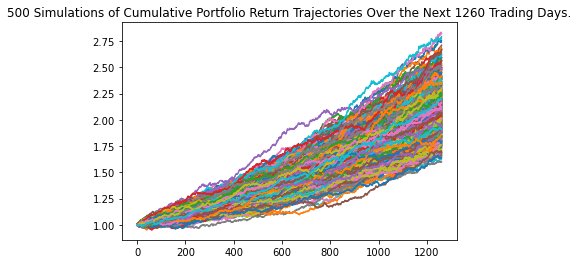

In [257]:
# Plot simulation outcomes
five_line_plot = MC_fiveyear.plot_simulation()
five_line_plot.plot()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

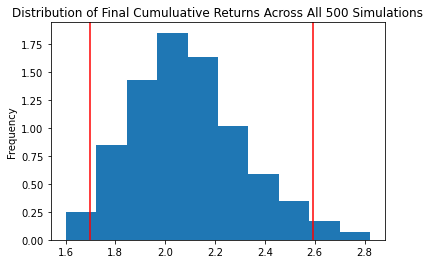

In [258]:
# Plot probability distribution and confidence intervals
MC_fiveyear.plot_distribution()

In [260]:
# Fetch summary statistics from the Monte Carlo simulation results
# Print summary statistics
fivetbl = MC_fiveyear.summarize_cumulative_return()
fivetbl

count           500.000000
mean              2.091414
std               0.222247
min               1.601066
25%               1.945615
50%               2.070665
75%               2.225916
max               2.822660
95% CI Lower      1.696349
95% CI Upper      2.591279
Name: 1260, dtype: float64

In [265]:
# Set initial investment
initinv= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
upci = round(fivetbl[9]*initinv,2)
lowci = round(fivetbl[8]*initinv,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initinv} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lowci} and ${upci}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $101780.95 and $155476.76


### Ten Years Retirement Option

In [267]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_5yrs,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999738,1.000663,0.998644,1.001447,1.000410,0.999447,1.000790,0.997321,1.001462,0.999010,...,1.002422,0.997351,1.002276,1.001484,1.006637,0.994409,0.998296,1.000694,0.999385,1.000844
2,1.000278,0.997433,1.002545,0.999369,0.994882,0.999474,1.003768,0.997594,1.001746,0.998434,...,1.003235,0.998414,0.999264,0.999969,1.005920,0.999795,0.998949,1.001678,0.994766,1.001880
3,1.004343,0.997671,1.003580,0.996779,0.999998,1.000044,0.999820,0.997778,1.001502,1.001463,...,1.008150,0.998051,1.002062,0.996389,1.003539,1.006976,0.999862,0.999364,0.993921,0.997840
4,1.004436,0.999827,0.998016,1.001606,0.999390,1.002654,0.996947,0.997888,1.002336,0.999965,...,1.014149,0.999618,1.002914,0.995086,1.004925,1.005113,0.999208,0.997780,0.993998,0.996977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.373887,5.707477,3.489166,4.506505,4.247695,4.645037,3.544217,4.360841,4.883621,3.849113,...,3.223018,5.749081,4.077810,4.344452,4.522144,4.517478,4.792403,5.242260,3.894549,4.633419
2517,5.361511,5.683322,3.491702,4.527750,4.271264,4.652739,3.547096,4.359936,4.890497,3.853134,...,3.223365,5.764039,4.063905,4.353464,4.536527,4.523656,4.785102,5.246230,3.884927,4.653563
2518,5.369112,5.684458,3.502204,4.535203,4.265637,4.669903,3.556341,4.363638,4.918221,3.876376,...,3.225312,5.758017,4.061651,4.356765,4.541912,4.548024,4.812559,5.237106,3.880472,4.658046
2519,5.364549,5.687070,3.502834,4.535309,4.266228,4.678761,3.558835,4.378459,4.926742,3.901577,...,3.214768,5.773284,4.057613,4.366253,4.548141,4.531104,4.824097,5.237540,3.915038,4.666693


In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


[]

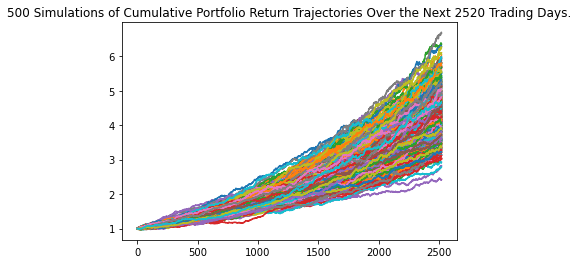

In [268]:
# Plot simulation outcomes
ten_line_plot = MC_tenyear.plot_simulation()
ten_line_plot.plot()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

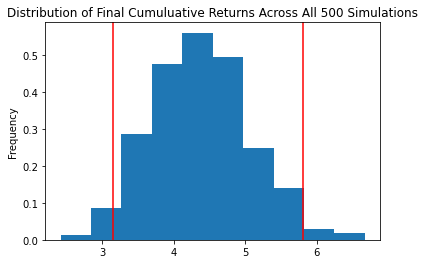

In [269]:
# Plot probability distribution and confidence intervals
MC_tenyear.plot_distribution()

In [270]:
# Fetch summary statistics from the Monte Carlo simulation results
# Print summary statistics

tentbl = MC_tenyear.summarize_cumulative_return()
tentbl

count           500.000000
mean              4.388174
std               0.688230
min               2.416949
25%               3.920030
50%               4.362180
75%               4.831670
max               6.671682
95% CI Lower      3.146773
95% CI Upper      5.802465
Name: 2520, dtype: float64

In [271]:
# Set initial investment
initinv = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
uptenci = round(tentbl[9]*initinv,2)
lowtenci = round(tentbl[8]*initinv,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initinv} in the portfolio"
      f" over the next ten years will end within in the range of"
      f" ${lowtenci} and ${uptenci}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next ten years will end within in the range of $188806.4 and $348147.89
